In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


## Data Loading

In [34]:
def ocp_cor_import(filename):
    """ Import cor file as pandas dataframe."""
    try:    
        df = pd.read_csv(
            filename,
            skiprows=26,
            sep='\s+',
            header=None,
            names=["E", "i", "T"],
        ) #index_col="Freq")

    except FileNotFoundError as e:
        print(f"Error: File was not found.")
        print(e.message)
        print(e.args)
        return None
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return None
    else:
        return df

In [42]:
OCP_CS_1_df = ocp_cor_import("Cast_Stellite1_OCP/OCP_1.cor")
OCP_CS_2_df = ocp_cor_import("Cast_Stellite1_OCP/OCP_2.cor")
OCP_CS_3_df = ocp_cor_import("Cast_Stellite1_OCP/OCP_3.cor")


OCP_HS_1_df = ocp_cor_import("HIPed_Stellite1_OCP/OCP_1.cor")
OCP_HS_2_df = ocp_cor_import("HIPed_Stellite1_OCP/OCP_2.cor")
OCP_HS_3_df = ocp_cor_import("HIPed_Stellite1_OCP/OCP_3.cor")
OCP_HS_4_df = ocp_cor_import("HIPed_Stellite1_OCP/OCP_4.cor")
OCP_HS_5_df = ocp_cor_import("HIPed_Stellite1_OCP/OCP_5.cor")
OCP_HS_6_df = ocp_cor_import("HIPed_Stellite1_OCP/OCP_6.cor")
OCP_HS_7_df = ocp_cor_import("HIPed_Stellite1_OCP/OCP_7.cor")
OCP_HS_8_df = ocp_cor_import("HIPed_Stellite1_OCP/OCP_8.cor")
OCP_HS_9_df = ocp_cor_import("HIPed_Stellite1_OCP/OCP_9.cor")
OCP_HS_10_df = ocp_cor_import("HIPed_Stellite1_OCP/OCP_10.cor")


OCP_CS_1_df

E             i        T
0      -0.326304  5.000000e-11      0.1
1      -0.326281  5.000000e-11      0.2
2      -0.326251  5.000000e-11      0.3
3      -0.326228  5.000000e-11      0.4
4      -0.326211  5.000000e-11      0.5
...          ...           ...      ...
143995 -0.152261  5.000000e-11  14399.6
143996 -0.152255  5.000000e-11  14399.7
143997 -0.152253  5.000000e-11  14399.8
143998 -0.152250  5.000000e-11  14399.9
143999 -0.152254  5.000000e-11  14400.0

[144000 rows x 3 columns]

In [43]:
import scipy
from scipy.stats import zscore

arr = OCP_CS_1_df["E"].to_numpy()
arr[np.abs(zscore(OCP_CS_1_df["E"])) > 3] = None

print(arr)


[      nan       nan       nan ... -0.152253 -0.15225  -0.152254]


[]

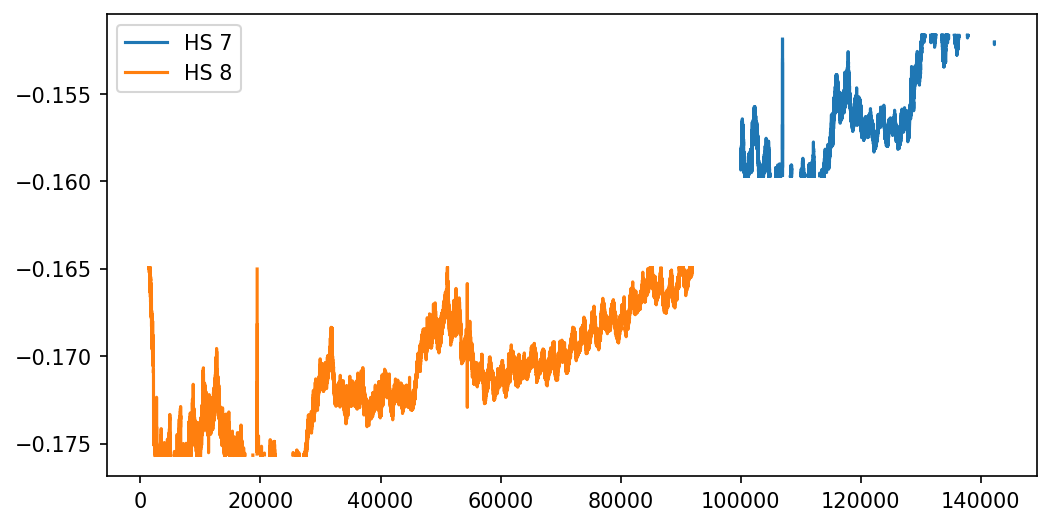

In [53]:
from scipy.stats import zscore

fig, ax = plt.subplots(figsize=(8,4), sharex=True, dpi=150)

for df, name in zip([OCP_HS_7_df, OCP_HS_8_df], 
                    ["HS 7", "HS 8"]):
    arr = df["E"].to_numpy()
    arr[np.abs(zscore(df["E"])) > 1] = None
    ax.plot(df["T"].to_numpy(), arr, label=name)


ax.legend()
ax.plot()


[]

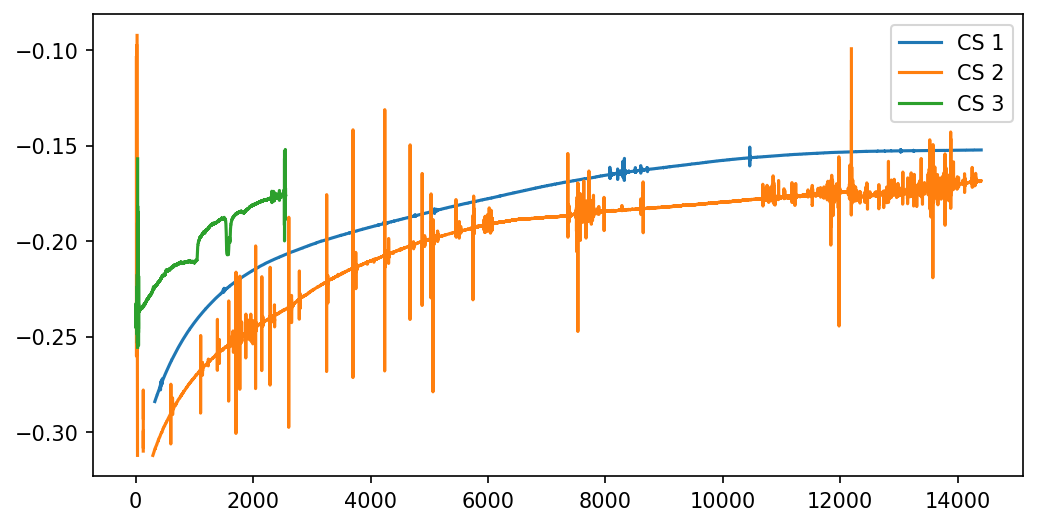

In [31]:
from scipy.stats import zscore

fig, ax = plt.subplots(figsize=(8,4), sharex=True, dpi=150)

for df, name in zip([OCP_CS_1_df, OCP_CS_2_df, OCP_CS_3_df], ["CS 1", "CS 2", "CS 3"]):
    arr = df["E"].to_numpy()
    arr[np.abs(zscore(df["E"])) > 1] = None
    ax.plot(df["T"].to_numpy(), arr, label=name)


ax.legend()
ax.plot()
